Hello,

I have some questions for you that I need to be answered before the board meeting Morning morning. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.


1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed? 
8. Anything else I should be aware of?

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import env
import acquire
import matplotlib.dates as mdates
import math
from sklearn import metrics
from random import randint
from matplotlib import style
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [69]:
df = acquire.get_curriculum_data()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


In [71]:
df.to_csv('project.csv')

In [247]:
df = pd.read_csv('project.csv')

In [248]:
df = df.drop(columns=['deleted_at','Unnamed: 0','slack','id'])

In [251]:
# drop staff cohort
df = df[df.cohort_id!=28]

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        816192 non-null  object 
 1   time        816192 non-null  object 
 2   path        816191 non-null  object 
 3   user_id     816192 non-null  int64  
 4   cohort_id   763299 non-null  float64
 5   ip          816192 non-null  object 
 6   name        763299 non-null  object 
 7   start_date  763299 non-null  object 
 8   end_date    763299 non-null  object 
 9   created_at  763299 non-null  object 
 10  updated_at  763299 non-null  object 
 11  program_id  763299 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 81.0+ MB


In [275]:
df[df.cohort_id.isnull()].user_id.unique()

array([ 48,  54,  58,  59,  61,  62,  63,  73,  74,  78,  79,  86,  88,
        89, 100, 103, 111, 137, 166, 176, 213, 247, 317, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 372, 375, 403, 406, 429, 544,  64, 713,
       714, 715, 716, 717, 718, 663, 719, 720, 721, 722, 723, 724, 725,
       726, 727, 728, 729, 346, 731, 736, 644, 744, 782, 810, 814, 815])

In [281]:
df[df.user_id==48].path.value_counts()

/                                             115
javascript-i                                   52
java-ii                                        52
html-css                                       40
java-iii                                       40
                                             ... 
spring/extra-features                           1
jquery/essential-methods/traversing             1
slides/deployment_and_dependencies              1
appendix/further-reading/spring/pagination      1
javascript-i/testing-user-functions             1
Name: path, Length: 147, dtype: int64

In [287]:
df.date[df.user_id==48].unique()

array(['2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
       '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06',
       '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10',
       '2018-02-11', '2018-02-20', '2018-02-21', '2018-02-22',
       '2018-02-23', '2018-03-02', '2018-03-05', '2018-03-06',
       '2018-03-07', '2018-03-08', '2018-03-13', '2018-03-15',
       '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-25',
       '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-30',
       '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05',
       '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13',
       '2018-04-16', '2018-04-24', '2018-04-26', '2018-04-27',
       '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
       '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09',
       '2018-05-10', '2018-05-11', '2018-05-14', '2018-05-15',
       '2018-05-19', '2018-05-21', '2018-05-22', '2018-05-24',
       '2018-05-28', '2018-05-30', '2018-05-31', '2018-

In [288]:
df[df.user_id==54].path.value_counts()

/                                              16
java-iii                                        6
java-i/syntax-types-and-variables               5
java-i/introduction-to-java                     5
java-iii/deployment-and-dependencies            4
                                               ..
javascript-ii/ajax-api                          1
javascript-ii/map-filter-reduce                 1
javascript-ii/es6                               1
spring/fundamentals/security/authentication     1
mysql/relationships                             1
Name: path, Length: 74, dtype: int64

In [289]:
df.date[df.user_id==54].unique()

array(['2018-01-28', '2018-01-29', '2018-03-10', '2018-03-12',
       '2018-03-20', '2018-08-12', '2018-09-23', '2018-10-12',
       '2018-11-19', '2018-11-23', '2018-12-26', '2018-12-30',
       '2019-01-04', '2019-01-06', '2019-03-03', '2019-03-21',
       '2019-03-25', '2019-03-26'], dtype=object)

In [290]:

df = df.fillna(0)

In [291]:
df.describe()

,user_id,cohort_id,program_id
count,816192.000000,816192.000000,816192.000000
mean,479.434735,47.468642,1.959676
std,240.231177,34.995461,0.649419
min,1.000000,0.000000,0.000000
25%,303.000000,25.000000,2.000000
50%,491.000000,34.000000,2.000000
75%,671.000000,58.000000,2.000000
max,981.000000,139.000000,4.000000


In [305]:
# program_id 3 is data science
df.name[df.program_id==3]

326053     Bayes
326054     Bayes
326055     Bayes
326056     Bayes
326057     Bayes
           ...  
900182    Easley
900183    Easley
900190    Easley
900191    Easley
900202    Easley
Name: name, Length: 103412, dtype: object

In [307]:
# create a separate df for ds cohorts

ds = df[df.program_id==3]
ds

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326053,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326054,2019-08-20,09:39:59,/,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326055,2019-08-20,09:39:59,/,468,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326056,2019-08-20,09:40:02,/,469,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326057,2019-08-20,09:40:08,/,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900182,2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900183,2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900190,2021-04-21,16:23:53,/,143,133.0,173.174.194.60,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900191,2021-04-21,16:23:57,clustering/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [309]:
# create a df for web dev

wd = df[df.program_id != 3]
wd

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900210,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0
900211,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
900212,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0
900213,2021-04-21,16:38:14,java-iii/servlets,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0


In [310]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        816192 non-null  object 
 1   time        816192 non-null  object 
 2   path        816192 non-null  object 
 3   user_id     816192 non-null  int64  
 4   cohort_id   816192 non-null  float64
 5   ip          816192 non-null  object 
 6   name        816192 non-null  object 
 7   start_date  816192 non-null  object 
 8   end_date    816192 non-null  object 
 9   created_at  816192 non-null  object 
 10  updated_at  816192 non-null  object 
 11  program_id  816192 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 81.0+ MB


In [312]:
df[df.created_at != df.updated_at]

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
72,2018-01-26,10:59:02,index.html,21,16.0,71.137.146.71,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
73,2018-01-26,10:59:06,java-i,21,16.0,71.137.146.71,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
254,2018-01-26,13:57:51,spring/extra-features/file-upload,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
1067,2018-01-29,09:28:24,jquery,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
1068,2018-01-29,09:28:31,jquery/ajax,40,16.0,97.105.19.61,Niagara,2016-10-26,2017-03-09,2016-10-26 02:34:05,2016-10-26 14:30:19,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
897930,2021-04-20,11:37:32,spring/fundamentals/repositories,709,61.0,206.109.18.52,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
897971,2021-04-20,11:47:11,html-css,705,61.0,136.50.68.20,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
897972,2021-04-20,11:47:14,html-css/css-ii/bootstrap-grid-system,705,61.0,136.50.68.20,Bash,2020-07-20,2021-01-21,2020-07-20 19:04:00,2020-09-30 15:54:46,2.0
898429,2021-04-20,15:04:46,java-iii,609,56.0,70.115.90.106,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0


In [313]:
df.path.nunique()

2141

In [395]:
df.path.value_counts(dropna=False).sort_values(ascending=False)

/                                                       43973
search/search_index.json                                18170
toc                                                     17386
javascript-i                                            17166
html-css                                                12351
                                                        ...  
interview-questions                                         1
interview                                                   1
RESTful-api                                                 1
content/examples/examples/gitbook/images/favicon.ico        1
11.02_TransformData.md                                      1
Name: path, Length: 2141, dtype: int64

In [401]:
df.path.value_counts()[df.path.value_counts()>10].tail(25)

regression/multivariate-regression-in-excel                   11
anomaly-detection/time-series-anomaly-detection-part-1        11
7-classification/handling-missing-values                      11
9-timeseries/4-prep                                           11
9-timeseries/5-explore                                        11
6-regression/multivariate-regression-in-excel                 11
12-distributed-ml/read-jdbc                                   11
appendix/testing-code                                         11
dataframes                                                    11
content/mysql/aliases-and-functions/functions.html            11
content/php_ii/array-functions/push-and-pop.html              11
uploads/5762c2946250b.jpg                                     11
content/jquery/resume-portfolio/gitbook/images/favicon.ico    11
1.10_JobReq_Indeed                                            11
cli-03-file-paths                                             11
objects                  

In [407]:
ds.path.value_counts()[ds.path.value_counts()>0].tail(25)

5-stats/4.2-compare-means/null                           1
appendix/cli/2-Overview                                  1
appendix/cls/2-listing-files                             1
misleading3_deaths.jpg                                   1
.gitignore                                               1
fundamentals/1-fundamentals/modern-data-scientist.jpg    1
appendix/interview-questions-students                    1
3-vocabulary                                             1
9-timeseries/6.1-parametric-modeling                     1
9-timeseries/6.2-prophet                                 1
12-distributed-ml/3-getting-started                      1
12-distributed-ml/4-acquire                              1
12-distributed-ml/5-inspect                              1
12-distributed-ml/6.1-prepare-part-1                     1
12-distributed-ml/6.2-prepare-part-2                     1
12-distributed-ml/6.3-prepare-part-3                     1
12-distributed-ml/6.4-prepare-part-4                    

In [418]:
wd.path.value_counts()[wd.path.value_counts()>5].tail(25)

7-classification/1-overview                                    6
10-anomaly-detection/4-detecting-timeseries-anomalies          6
content/laravel/intro/index.html                               6
9-timeseries/6.1-parametric-modeling                           6
Clustering_Explore                                             6
content/php_iv/exceptions/throwing.html                        6
content/mysql/basic-statements/gitbook/images/favicon.ico      6
13-advanced-topics/3.2-virtual-environments                    6
content/appendix/further-reading/gitbook/images/favicon.ico    6
6-regression/2-regression-excel                                6
passwords                                                      6
content/appendix/code-standards/mysql.html                     6
2-storytelling/3-tableau                                       6
1-fundamentals/2.3-visualization-with-excel                    6
content/mysql/relationships/joins.html                         6
control-statements-and-lo

In [316]:
df.cohort_id.value_counts()

0.0      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [317]:
df.cohort_id.nunique()

47

In [318]:
df.ip.value_counts()

97.105.19.58       260986
97.105.19.61        61662
192.171.117.210      9302
67.11.50.23          4181
172.124.67.93        3511
                    ...  
172.58.96.4             1
37.60.189.18            1
99.203.155.43           1
184.226.32.25           1
162.251.232.107         1
Name: ip, Length: 5284, dtype: int64

In [319]:
df.date = pd.to_datetime(df.date)

In [320]:
df.created_at = pd.to_datetime(df.created_at)

In [321]:
df.updated_at = pd.to_datetime(df.updated_at)

In [322]:
df.start_date = pd.to_datetime(df.start_date)

In [323]:
df.end_date = pd.to_datetime(df.end_date)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 900217
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        816192 non-null  datetime64[ns]
 1   time        816192 non-null  object        
 2   path        816192 non-null  object        
 3   user_id     816192 non-null  int64         
 4   cohort_id   816192 non-null  float64       
 5   ip          816192 non-null  object        
 6   name        816192 non-null  object        
 7   start_date  816192 non-null  datetime64[ns]
 8   end_date    816192 non-null  datetime64[ns]
 9   created_at  816192 non-null  datetime64[ns]
 10  updated_at  816192 non-null  datetime64[ns]
 11  program_id  816192 non-null  float64       
dtypes: datetime64[ns](5), float64(2), int64(1), object(4)
memory usage: 81.0+ MB


In [325]:
df = df.set_index(df.date).sort_index()

<AxesSubplot:xlabel='date'>

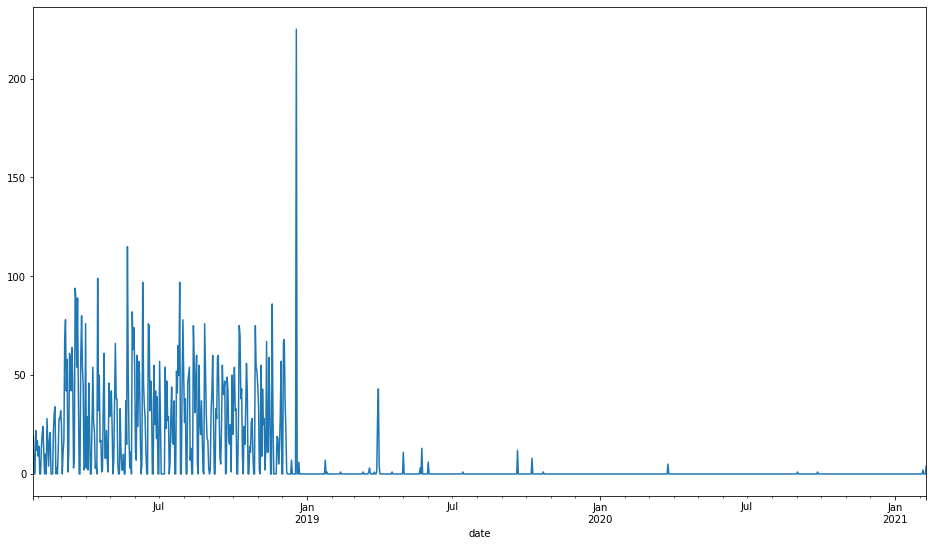

In [326]:
df[df.cohort_id==1].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

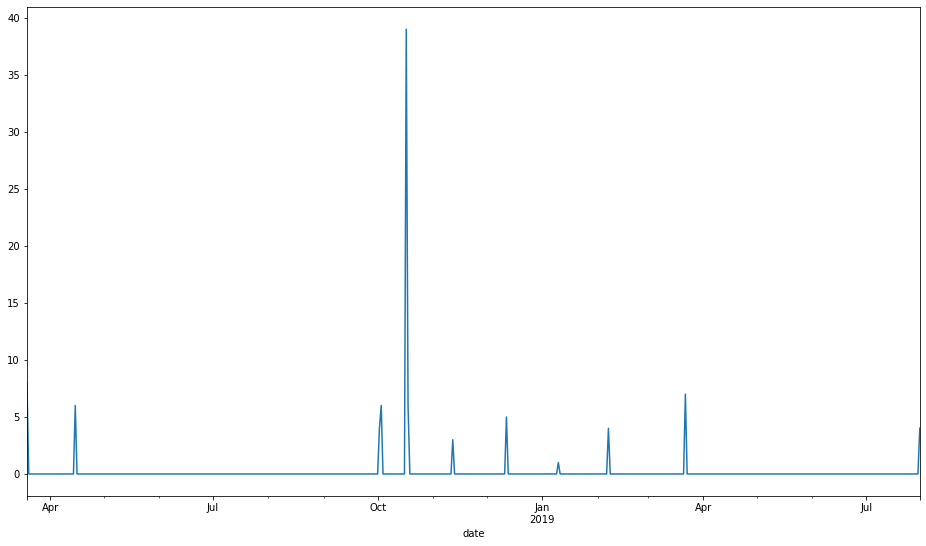

In [327]:
df[df.cohort_id==2].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

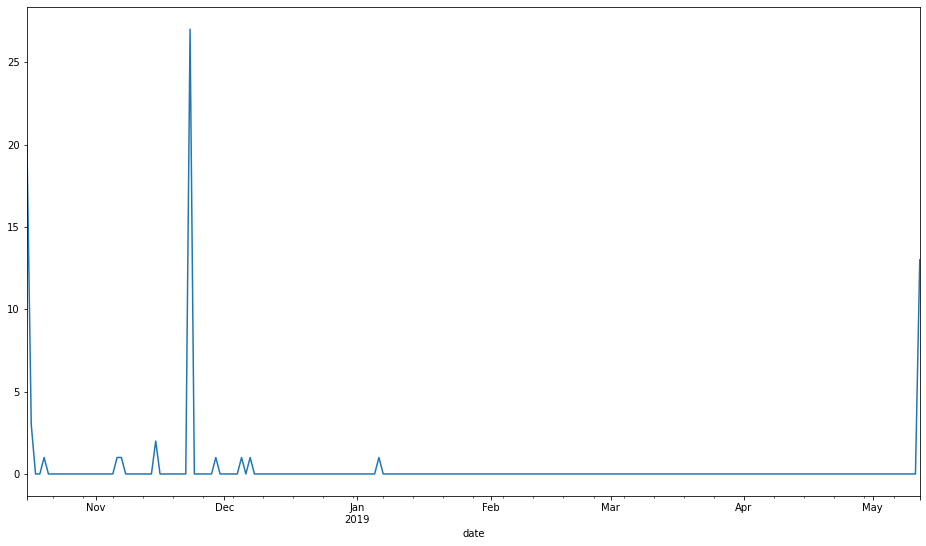

In [328]:
df[df.cohort_id==6].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

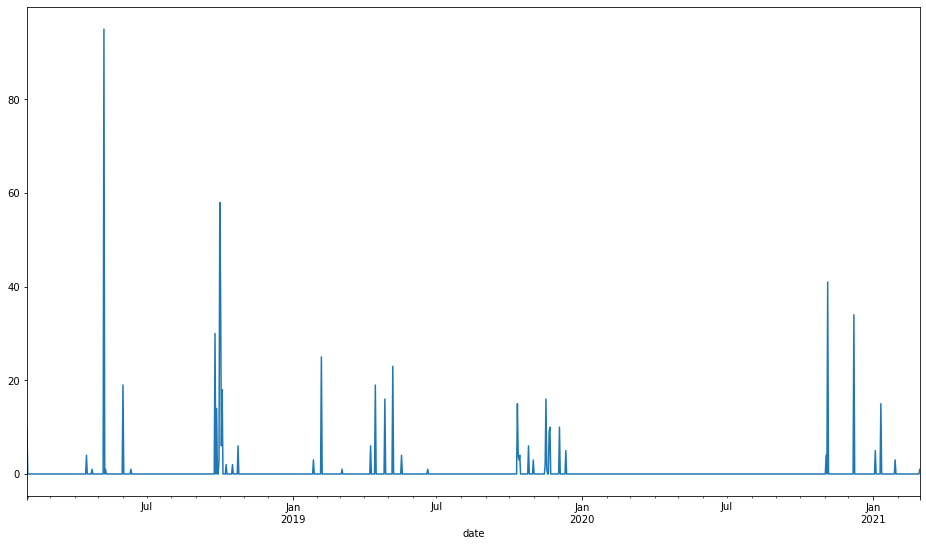

In [329]:
df[df.cohort_id==7].path.resample('d').count().plot(figsize=[16,9])

<AxesSubplot:xlabel='date'>

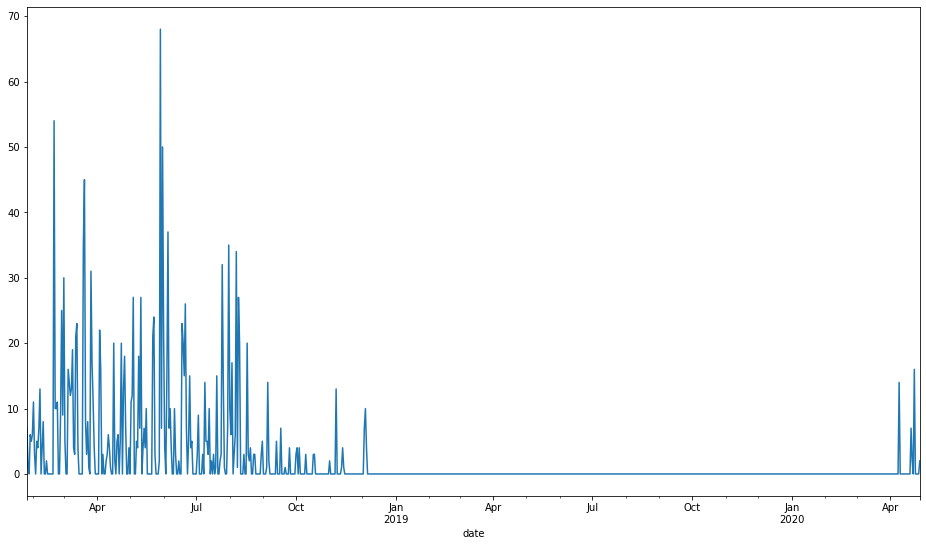

In [330]:
df[df.cohort_id==8].path.resample('d').count().plot(figsize=[16,9])

In [331]:
df.groupby(['user_id','ip']).path.resample('m').count().idxmax()

(570, '172.124.67.93', Timestamp('2020-04-30 00:00:00'))

In [332]:
df.groupby('user_id').path.count().sort_values()

user_id
163       1
212       1
918       1
66        1
165       1
       ... 
64     3817
570    4584
344    5460
495    6451
53     8197
Name: path, Length: 957, dtype: int64

In [333]:
user_path_count = df.groupby('user_id').path.count()

In [334]:
# Calculate the z-score 
zscores = pd.Series((user_path_count - user_path_count.mean()) / user_path_count.std())

# Finds all of the observations three standard deviations or more
user_path_count[zscores.abs() >= 3]

user_id
53     8197
64     3817
344    5460
423    3804
495    6451
524    3512
555    3687
570    4584
581    3473
685    3522
Name: path, dtype: int64

In [335]:
#save ip_counts into separate dataframe
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index':'ip','ip':'count'})
ip_df

,ip,count
0,97.105.19.58,260986
1,97.105.19.61,61662
2,192.171.117.210,9302
3,67.11.50.23,4181
4,172.124.67.93,3511
...,...,...
5279,172.58.96.4,1
5280,37.60.189.18,1
5281,99.203.155.43,1
5282,184.226.32.25,1


In [336]:
 ip_df['prob'] = df.ip.value_counts(normalize=True).reset_index().ip

In [337]:
ip_df.head()

,ip,count,prob
0,97.105.19.58,260986,0.319761
1,97.105.19.61,61662,0.075548
2,192.171.117.210,9302,0.011397
3,67.11.50.23,4181,0.005123
4,172.124.67.93,3511,0.004302


In [338]:
ip_df.ip.nunique()

5284

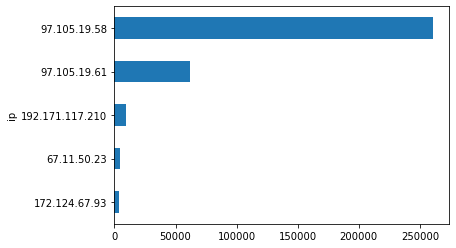

In [339]:
#plot them - top 5
ip_df.set_index('ip')['count'].head(5).sort_values().plot.barh()
plt.show()

In [340]:
#prob(B)
Pb = df.groupby('ip').size() / len(df)
Pb

ip
100.11.170.135     0.000140
100.19.73.35       0.000500
100.35.67.162      0.000013
103.137.12.164     0.000011
103.208.220.130    0.000001
                     ...   
99.97.208.154      0.000020
99.97.210.12       0.000022
99.98.32.165       0.000327
99.98.32.97        0.000056
99.98.36.168       0.000479
Length: 5284, dtype: float64

In [341]:
#prob(A & B)
Pab = df.groupby(['ip','user_id']).size() / len(df)
Pab

ip               user_id
100.11.170.135   658        0.000140
100.19.73.35     658        0.000500
100.35.67.162    52         0.000013
103.137.12.164   469        0.000011
103.208.220.130  369        0.000001
                              ...   
99.97.208.154    875        0.000006
99.97.210.12     606        0.000022
99.98.32.165     324        0.000327
99.98.32.97      481        0.000056
99.98.36.168     310        0.000479
Length: 7217, dtype: float64

In [342]:
Pab / Pb

ip               user_id
100.11.170.135   658        1.0000
100.19.73.35     658        1.0000
100.35.67.162    52         1.0000
103.137.12.164   469        1.0000
103.208.220.130  369        1.0000
                             ...  
99.97.208.154    875        0.3125
99.97.210.12     606        1.0000
99.98.32.165     324        1.0000
99.98.32.97      481        1.0000
99.98.36.168     310        1.0000
Length: 7217, dtype: float64

In [343]:
# Given a particular ip, what is probability of a certain status code
#same thing, diferent method, using groupby and normalizing value counts

user_ip = df.groupby('ip').user_id.value_counts(normalize=True).\
                rename('user_ip').reset_index()
user_ip.head()

,ip,user_id,user_ip
0,100.11.170.135,658,1.0
1,100.19.73.35,658,1.0
2,100.35.67.162,52,1.0
3,103.137.12.164,469,1.0
4,103.208.220.130,369,1.0


In [344]:
user_ip [user_ip.user_ip < 1]

,ip,user_id,user_ip
12,104.1.46.153,136,0.727273
13,104.1.46.153,244,0.272727
14,104.10.49.137,613,0.964958
15,104.10.49.137,594,0.032829
16,104.10.49.137,615,0.002213
...,...,...,...
7180,99.43.143.116,784,0.427382
7195,99.61.24.168,418,0.787546
7196,99.61.24.168,458,0.212454
7211,99.97.208.154,800,0.687500


In [345]:
df [df.ip == '104.10.49.137'].sort_values('user_id', 
                                           ascending=False)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
date,,,,,,,,,,,,
2020-03-21,2020-03-21,12:57:57,javascript-i/conditionals,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:43:18,search/search_index.json,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:29,javascript-i/functions,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:18,javascript-i/loops,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-21,2020-03-21,13:36:12,javascript-i/testing-user-functions,615,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,2020-02-29,21:16:31,html-css/elements,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-02-29,2020-02-29,21:16:34,html-css/forms,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0
2020-03-02,2020-03-02,20:13:52,html-css/css-i/positioning,594,56.0,104.10.49.137,Apex,2020-02-24,2020-07-29,2020-02-24 15:39:33,2020-07-29 18:41:13,2.0


In [346]:
df = df.merge(user_ip, how='left', on=['ip','user_id'])
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.021115


In [347]:
df [df.user_ip < .01]

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,user_ip
9,2018-01-26,09:58:26,javascript-i/functions,4,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.007152
19,2018-01-26,10:02:21,javascript-i/functions,8,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.006146
20,2018-01-26,10:02:42,javascript-i/functions,9,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.009098
23,2018-01-26,10:08:22,mkdocs/search_index.json,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,0.001962
24,2018-01-26,10:08:34,git/merge-conflict-demo,10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,0.001962
...,...,...,...,...,...,...,...,...,...,...,...,...,...
785883,2021-03-25,16:38:16,/,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785887,2021-03-25,16:39:07,anomaly-detection/overview,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785888,2021-03-25,16:39:08,anomaly-detection/AnomalyDetectionCartoon.jpeg,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590
785891,2021-03-25,16:40:22,regression/project,841,133.0,192.171.117.210,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0,0.005590


In [348]:
df.program_id.value_counts()

2.0    629334
3.0    103412
0.0     52893
1.0     30548
4.0         5
Name: program_id, dtype: int64

In [349]:
#save ip_counts into separate dataframe
path_df = pd.DataFrame(df.path.value_counts(dropna=False)).reset_index().\
                rename(columns={'index':'path','path':'count'})
path_df

,path,count
0,/,43973
1,search/search_index.json,18170
2,toc,17386
3,javascript-i,17166
4,html-css,12351
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


In [352]:
# remove root directory
path_df = path_df[path_df.path != '/']
path_df

,path,count
1,search/search_index.json,18170
2,toc,17386
3,javascript-i,17166
4,html-css,12351
5,java-iii,12340
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


In [356]:
# remove json index path
path_df = path_df[path_df.path != 'search/search_index.json']
path_df

,path,count
2,toc,17386
3,javascript-i,17166
4,html-css,12351
5,java-iii,12340
6,java-ii,11425
...,...,...
2136,7.4.2-series,1
2137,5.04.05_Exercises,1
2138,one,1
2139,prework/cli/07-editing-files-with-vim,1


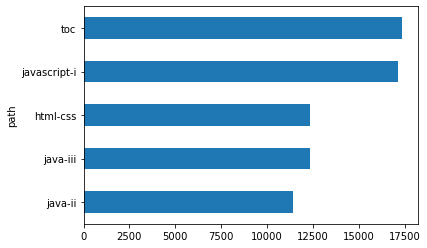

In [357]:
#plot them - top 5
path_df.set_index('path')['count'].head(5).sort_values().plot.barh()
plt.show()

In [392]:
#plot them - bottom 25
path_df.set_index('path')['count'].tail(5).sort_values() #.plot.barh(figsize=[16,9])
#plt.show()

path
7.4.2-series                             1
5.04.05_Exercises                        1
one                                      1
prework/cli/07-editing-files-with-vim    1
11.02_TransformData.md                   1
Name: count, dtype: int64

In [358]:
#prob(B)
Pb = df.groupby('path').size() / len(df)
Pb

path
0                                   0.000001
%20https://github.com/RaulCPena     0.000001
,%20https://github.com/RaulCPena    0.000001
.git                                0.000001
.gitignore                          0.000002
                                      ...   
web-dev-day-two                     0.000002
where                               0.000001
working-with-time-series-data       0.000017
wp-admin                            0.000001
wp-login                            0.000001
Length: 2141, dtype: float64

In [359]:
#prob(A & B)
Pab = df.groupby(['path','cohort_id']).size() / len(df)
Pab

path                              cohort_id
0                                 55.0         0.000001
%20https://github.com/RaulCPena   55.0         0.000001
,%20https://github.com/RaulCPena  55.0         0.000001
.git                              24.0         0.000001
.gitignore                        24.0         0.000001
                                                 ...   
web-dev-day-two                   61.0         0.000002
where                             137.0        0.000001
working-with-time-series-data     59.0         0.000017
wp-admin                          22.0         0.000001
wp-login                          22.0         0.000001
Length: 13274, dtype: float64

In [360]:
Pab / Pb

path                              cohort_id
0                                 55.0         1.0
%20https://github.com/RaulCPena   55.0         1.0
,%20https://github.com/RaulCPena  55.0         1.0
.git                              24.0         1.0
.gitignore                        24.0         0.5
                                              ... 
web-dev-day-two                   61.0         1.0
where                             137.0        1.0
working-with-time-series-data     59.0         1.0
wp-admin                          22.0         1.0
wp-login                          22.0         1.0
Length: 13274, dtype: float64

In [361]:
cohort_path = df.groupby('path').cohort_id.value_counts(normalize=True).\
                rename('cohort_path').reset_index()
cohort_path.head()

,path,cohort_id,cohort_path
0,0,55.0,1.0
1,%20https://github.com/RaulCPena,55.0,1.0
2,",%20https://github.com/RaulCPena",55.0,1.0
3,.git,24.0,1.0
4,.gitignore,24.0,0.5


In [362]:
cohort_path [cohort_path.cohort_path < 1]

,path,cohort_id,cohort_path
4,.gitignore,24.0,0.500000
5,.gitignore,59.0,0.500000
7,/,0.0,0.101403
8,/,59.0,0.067769
9,/,24.0,0.047779
...,...,...,...
13264,web-design/ux/purpose,18.0,0.004065
13265,web-design/ux/purpose,21.0,0.004065
13266,web-design/ux/purpose,24.0,0.004065
13267,web-design/ux/purpose,25.0,0.004065


In [425]:
cohort_path.path.value_counts().tail(25)

appendix/cli/2-overview                           1
appendix/cli/2-Overview                           1
appendix/cli                                      1
appendix/capstone/workbook                        1
appendix/capstone-workbook/project-proposal       1
appendix/capstone                                 1
appendix/further-reading/java/intellij            1
appendix/further-reading/java/intellij-tomcat     1
appendix/further-reading/javascript               1
appendix/open_data/www.census.gov                 1
appendix/spring/security-use-cases                1
appendix/spring/authorization                     1
appendix/professional-resume                      1
appendix/professional                             1
appendix/open_data/www.openstreetmap.org          1
appendix/open_data/www.flickr.com/services/api    1
appendix/job-search-workshop                      1
appendix/further-reading/mysq                     1
appendix/javascript                               1
appendix/jav

In [363]:
# df = df.merge(cohort_path, how='left', on=['path','cohort_id'])
# df.head()

## Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [364]:
path_by_cohort = df.groupby('cohort_id').path.value_counts().reset_index(name='counts')
path_by_cohort

,cohort_id,path,counts
0,0.0,/,4459
1,0.0,search/search_index.json,1985
2,0.0,javascript-i,780
3,0.0,toc,706
4,0.0,spring,641
...,...,...,...
13269,139.0,java-iii/servlets,1
13270,139.0,javascript-i/bom-and-dom/dom,1
13271,139.0,javascript-i/objects,1
13272,139.0,javascript-i/objects/math,1


In [365]:
path_by_cohort = path_by_cohort[path_by_cohort.cohort_id != 28]

In [366]:
path_by_cohort = path_by_cohort[path_by_cohort.path != '/']

<AxesSubplot:>

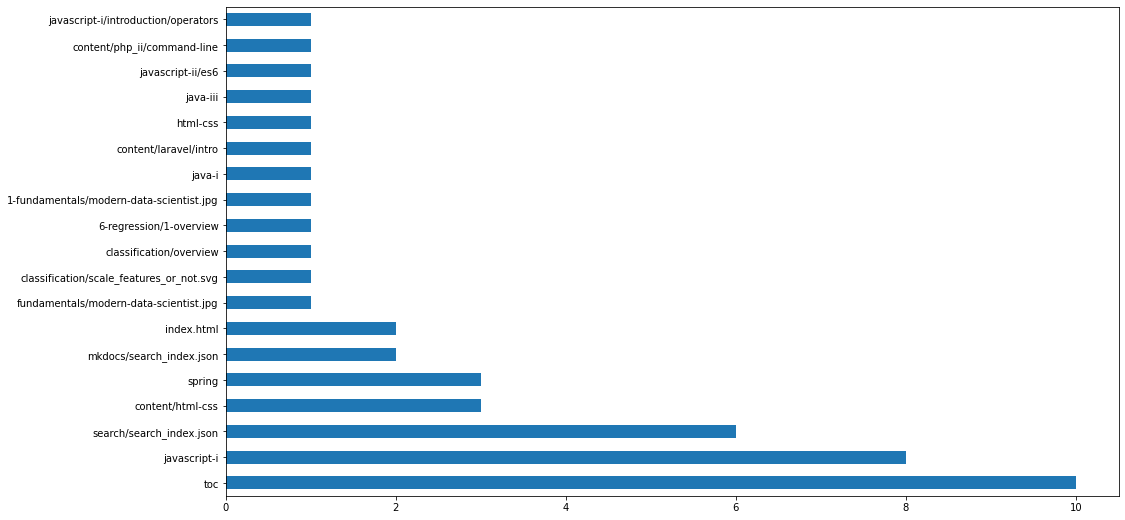

In [367]:
path_by_cohort.groupby('cohort_id').path.head(1).value_counts().plot.barh(figsize=[16,9])

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816192 entries, 0 to 816191
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        816192 non-null  datetime64[ns]
 1   time        816192 non-null  object        
 2   path        816192 non-null  object        
 3   user_id     816192 non-null  int64         
 4   cohort_id   816192 non-null  float64       
 5   ip          816192 non-null  object        
 6   name        816192 non-null  object        
 7   start_date  816192 non-null  datetime64[ns]
 8   end_date    816192 non-null  datetime64[ns]
 9   created_at  816192 non-null  datetime64[ns]
 10  updated_at  816192 non-null  datetime64[ns]
 11  program_id  816192 non-null  float64       
 12  user_ip     816192 non-null  float64       
dtypes: datetime64[ns](5), float64(3), int64(1), object(4)
memory usage: 87.2+ MB


<AxesSubplot:ylabel='user_id,path'>

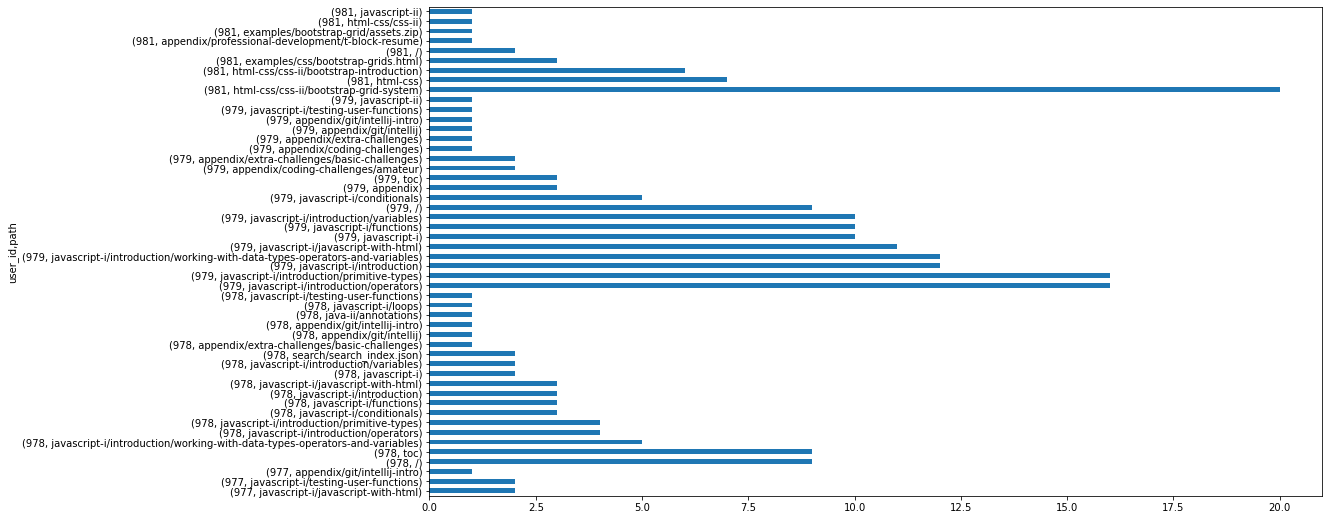

In [439]:
df.groupby('user_id').path.value_counts().tail(50).plot.barh(figsize=[16,9])

<AxesSubplot:>

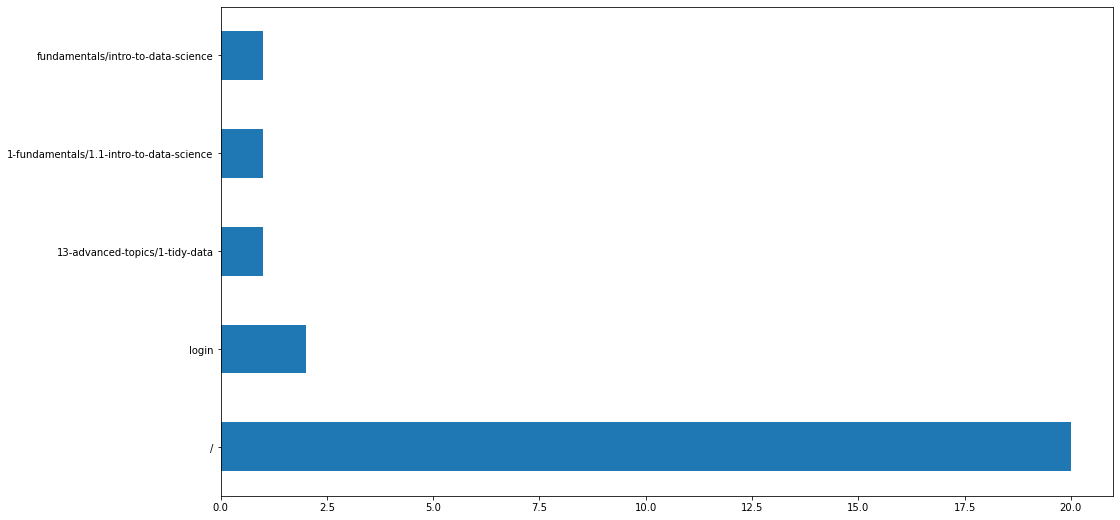

In [370]:
ds.groupby('cohort_id').path.head(5).value_counts().plot.barh(figsize=[16,9])

In [372]:
ds_path = ds[ds.path != '/']
ds_path

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
326064,2019-08-20,09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326067,2019-08-20,09:40:30,2-storytelling/bad-charts,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326068,2019-08-20,09:40:30,2-storytelling/misleading1_baseball.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326069,2019-08-20,09:40:30,2-storytelling/misleading1_fox.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
326070,2019-08-20,09:40:30,2-storytelling/misleading3_deaths.jpg,467,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900152,2021-04-21,16:01:24,classification/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900182,2021-04-21,16:14:16,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900183,2021-04-21,16:15:51,regression/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0
900191,2021-04-21,16:23:57,clustering/project,841,133.0,99.162.244.233,Easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,3.0


In [381]:
ds_path.name.value_counts()

Darden      29035
Bayes       24571
Curie       19870
Easley      13600
Florence     7978
Name: name, dtype: int64

In [382]:
ds_path.groupby('cohort_id').path.head(1) #.value_counts().plot.barh(figsize=[16,9])

326064                3-sql/1-mysql-overview
445311                                 login
597057        13-advanced-topics/1-tidy-data
755221       python/data-types-and-variables
847096    fundamentals/intro-to-data-science
Name: path, dtype: object

<AxesSubplot:>

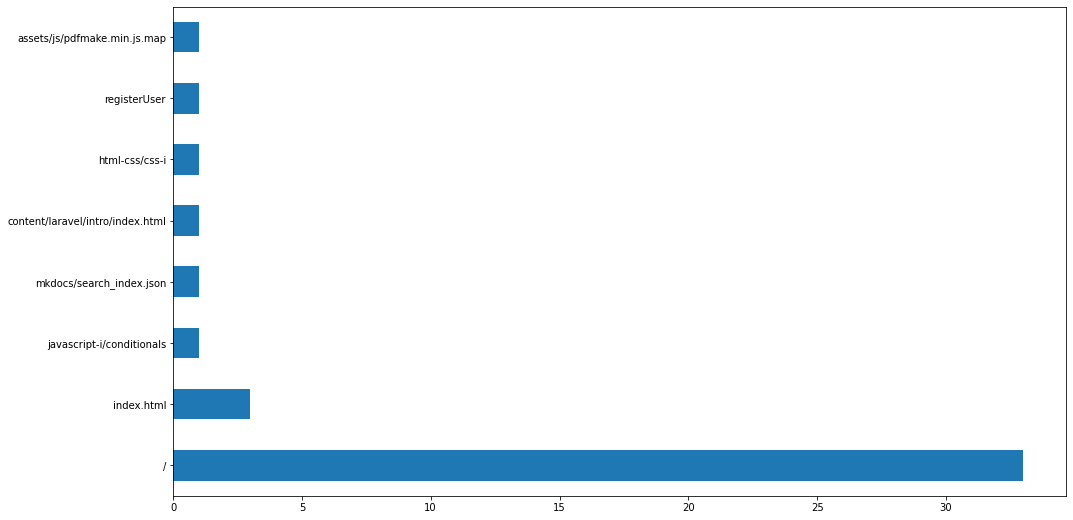

In [376]:
wd.groupby('cohort_id').path.head(1).value_counts().plot.barh(figsize=[16,9])

In [377]:
wd_path = wd[wd.path != '/']
wd_path

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
5,2018-01-26,09:56:41,javascript-i/loops,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
900210,2021-04-21,16:36:09,jquery/personal-site,869,135.0,136.50.98.51,Marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,2.0
900211,2021-04-21,16:36:34,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,Neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,2.0
900212,2021-04-21,16:37:48,java-iii,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0
900213,2021-04-21,16:38:14,java-iii/servlets,834,134.0,67.11.50.23,Luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,2.0


<AxesSubplot:>

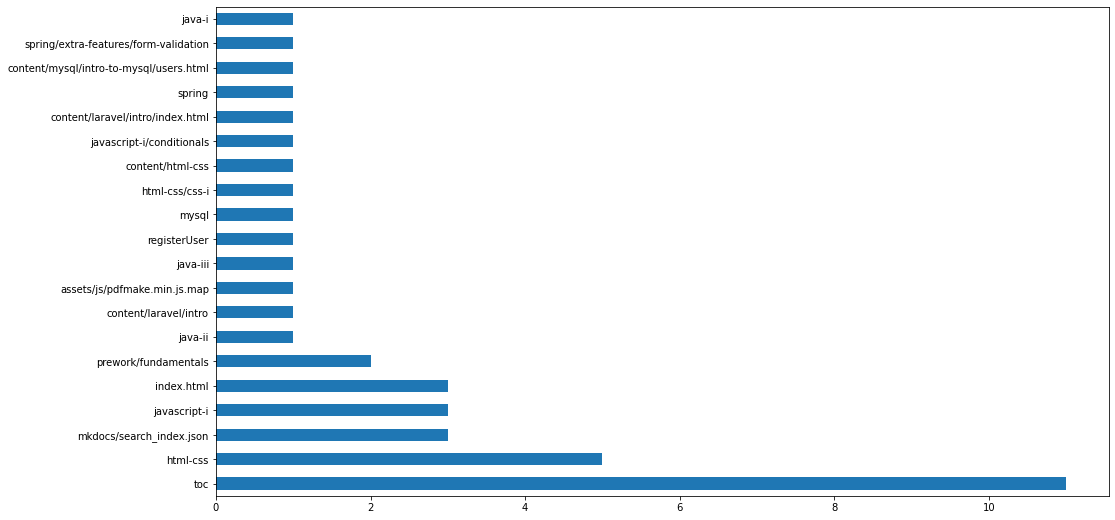

In [379]:
wd_path.groupby('cohort_id').path.head(1).value_counts().plot.barh(figsize=[16,9])

- Web Dev students access html-css and javascript-i most across all cohorts.

- Data Science students access fundamentals/intro-to-data-science and python/data-types-and-variables most across all cohorts.

In [245]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,user_ip,cohort_path
date,,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.004174
2018-01-26,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.003626
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.001280
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.005859
2018-01-26,2018-01-26,09:56:24,javascript-i/conditionals,2,22,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,0.021115,0.052304


In [246]:
df[df.program_id==1]

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id,user_ip,cohort_path
date,,,,,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,/,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.004174
2018-01-26,2018-01-26,09:56:02,java-ii,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.003626
2018-01-26,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.001280
2018-01-26,2018-01-26,09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.016477,0.005859
2018-01-26,2018-01-26,10:14:47,/,11,1,97.105.19.61,1.0,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,0.023661,0.012442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-10,2021-04-10,00:20:55,content/javascript/conditionals.html,51,13,72.179.168.148,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.000000,0.270833
2021-04-10,2021-04-10,00:21:15,content/javascript/loops.html,51,13,72.179.168.148,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,1.000000,0.210526
2021-04-10,2021-04-10,00:28:10,content/javascript/javascript-with-html.html,80,14,136.50.29.193,14.0,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,1.000000,0.196078


## Which lessons do students access most after graduation?

In [428]:
df.path[df.date > df.end_date].value_counts()

/                                     13643
search/search_index.json               4810
javascript-i                           3928
spring                                 3500
html-css                               2902
                                      ...  
6-regression/2-intro-to-regression        1
5-stats/1-descriptive-stats               1
interview                                 1
interview-questions                       1
content/control-structures-ii             1
Name: path, Length: 1736, dtype: int64

In [429]:
ds.path[ds.date > ds.end_date].value_counts()

/                                           1436
search/search_index.json                     493
sql/mysql-overview                           275
classification/overview                      266
classification/scale_features_or_not.svg     219
                                            ... 
DataToAction_v2.jpg                            1
advanced-topics/tidy-data                      1
10-anomaly-detection/isolation-forests         1
cli/moving-files                               1
individual-project/individual-project          1
Name: path, Length: 437, dtype: int64

In [432]:
wd.date = pd.to_datetime(wd.date)

In [433]:
wd.end_date = pd.to_datetime(wd.end_date)

In [435]:
wd.path[wd.date > wd.end_date].value_counts().head(10)

/                           12207
search/search_index.json     4317
javascript-i                 3928
spring                       3499
html-css                     2902
java-iii                     2711
java-ii                      2687
java-i                       2666
javascript-ii                2421
toc                          2359
Name: path, dtype: int64